# Libraries

In [1]:
# basic operations
import os
import re
# import time


# data analysis/management/manipulation
import numpy as np
import pandas as pd
# import sklearn

# text analysis
import gensim
from gensim.models import LdaModel, ldamodel
from gensim.models import LsiModel, lsimodel
from gensim.models import Phrases
from gensim.models import CoherenceModel  
from gensim.corpora import Dictionary
# from gensim.similarities import MatrixSimilarity
'''
Uncomment the next two lines of code if you don't have a copy of the
Mallet software installed in your machine
'''
# ! wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip # * update if needed *
# ! unzip mallet-2.0.8.zip
import spacy
import en_core_web_lg

 
# distance metrics
# from scipy.spatial.distance import cosine

# visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [2]:
# data vis
%matplotlib inline

# Load data

In [3]:
## Read in the scraped data
CWD=os.getcwd()
FOLDER='New Twitter data'
FILE='Twitter_Stop.csv'

df = pd.read_csv(os.path.join(CWD,'try.csv'))

In [4]:
df.dropna(subset=['tweet'],inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99485 entries, 0 to 100236
Data columns (total 5 columns):
Unnamed: 0    99485 non-null int64
tweet         99485 non-null object
label         99485 non-null object
year          99485 non-null int64
original      99485 non-null object
dtypes: int64(2), object(3)
memory usage: 4.6+ MB


In [6]:
df.reset_index(inplace=True)

In [7]:
df=df.drop(['Unnamed: 0','index'],axis=1)

In [8]:
df

,tweet,label,year,original
0,perfect owners,Electric,2015,#MyFord #Mobile Is a #SmartWatch #App Perfect ...
1,exclusive video gms path plans highlights,Electric,2015,#solar Exclusive Video On GM’s Electric Vehicl...
2,hong kong announcement worlds biggest rally su...,Electric,2015,@harbourtimes Hong Kong announcement - 2016 wo...
3,exclusive video gms path plans highlights,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,..."
4,exclusive video gms path plans highlights orig...,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,..."
...,...,...,...,...
99480,projected barrel oil electrichybrid makers com...,Hybrid,2015,Projected $40/Barrel Oil in 2015. How are elec...
99481,affordable also fuel efficient c epaestimated mpg,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...
99482,affordable also fuel efficient c epaestimated mpg,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...
99483,kick models technology including mondeo,Hybrid,2015,"To kick off 2015, we're looking at all the new..."


In [9]:
len(df[df['label']=='Electric'])

55312

In [10]:
len(df[df['label']=='Hybrid'])

44173

In [14]:
#df['docs_phrases'] = df['docs_phrases'].str.replace('[^\\w\\s]','')

In [11]:
df

,tweet,label,year,original
0,perfect owners,Electric,2015,#MyFord #Mobile Is a #SmartWatch #App Perfect ...
1,exclusive video gms path plans highlights,Electric,2015,#solar Exclusive Video On GM’s Electric Vehicl...
2,hong kong announcement worlds biggest rally su...,Electric,2015,@harbourtimes Hong Kong announcement - 2016 wo...
3,exclusive video gms path plans highlights,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,..."
4,exclusive video gms path plans highlights orig...,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,..."
...,...,...,...,...
99480,projected barrel oil electrichybrid makers com...,Hybrid,2015,Projected $40/Barrel Oil in 2015. How are elec...
99481,affordable also fuel efficient c epaestimated mpg,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...
99482,affordable also fuel efficient c epaestimated mpg,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...
99483,kick models technology including mondeo,Hybrid,2015,"To kick off 2015, we're looking at all the new..."


In [18]:
#DOCS_PHRASED= [docs_phrases.strip().split() for docs_phrases in df.docs_phrases]

In [19]:
#DOCS_PHRASED

[['perfect', 'owner'],
 ['exclusive', 'video', 'gms', 'path', 'plan', 'highlight', 'vid'],
 ['market', 'poise', 'expand'],
 ['bellevue', 'university', 'activate', 'charge', 'station'],
 ['dl', 'subaru', 'dl', 'conversion', 'work', 'fully'],
 ['vah'],
 ['volt', 'available', 'nationwide', 'st'],
 ['industry', 'set', 'star', 'las_vegas', 'gm', 'tm', 'nsany'],
 ['discount', 'program', 'extend', 'january', 'contact'],
 ['spare', 'part'],
 ['market', 'poise', 'expand', 'breakneck', 'speed'],
 ['market', 'expand', 'far', 'segment', 'expect', 'grow'],
 ['read', 'daily', 'story'],
 ['forecast', 'trend', 'opportunity'],
 ['faraday_future', 'tease', 'ces'],
 ['sale', 'continue', 'grow'],
 ['market', 'poise', 'expand', 'breakneck', 'speed', 'bn', 'market'],
 ['buddies', 'association'],
 ['buddies', 'association', 'conc'],
 ['level', 'award', 'awareness', 'suitable', 'member'],
 ['believe', 'market', 'powered', 'fc', 'lithium', 'fc', 'battery'],
 ['know', 'hotel', 'chain', 'charge', 'station', 'dif

# Spacy pipeline

In [12]:
# list of tweet
DOCS = [tweet.strip().lower() for tweet in df.tweet]

# hyphen to underscores
DOCS = [re.sub(r'\b-\b', '_', text) for text in DOCS]

In [13]:
nlp = spacy.load('en_core_web_lg')

## Take into account bi- and tri-grams

In [14]:
# lemmatization

DOCS_TOKENS, TMP_TOKENS = [], []

for doc in DOCS:
    TMP_TOKENS=[token.lemma_ for token in nlp(doc) 
                  if not token.is_stop
                  and not token.like_num
                  and not token.is_oov
                  and len(token.lemma_) > 1]
    DOCS_TOKENS.append(TMP_TOKENS)
    TMP_TOKENS=[]

In [15]:
# get rid of common terms
COMMON_TERMS = [u'of', u'with', u'without', u'and', u'or', u'the', u'a',
                u'not', 'be', u'to', u'this', u'who', u'in']

# find phrases
BIGRAM = Phrases(DOCS_TOKENS,
                 min_count=50,
                 threshold=5,
                 max_vocab_size=50000,
                 common_terms=COMMON_TERMS)

TRIGRAM = Phrases(BIGRAM[DOCS_TOKENS],
                  min_count=50,
                  threshold=5,
                  max_vocab_size=50000,
                  common_terms=COMMON_TERMS)

# uncomment if bi-grammed, tokenized document is preferred
# DOCS_PHRASED = [BIGRAM[line] for line in DOCS_TOKENS]
DOCS_PHRASED = [TRIGRAM[BIGRAM[line]] for line in DOCS_TOKENS]

# check nlp pipeline
#print('',
#      'Tokenized:', DOCS_TOKENS[0],
#      'Tri-grammed tokenised:', DOCS_PHRASED[0],
#      sep=LINE, end=LINE)

In [19]:
df['docs_phrases']=DOCS_PHRASED
df.to_pickle(os.path.join(CWD,FOLDER,'Twitter_Phrases.pkl'))

In [70]:
df.to_pickle(os.path.join(CWD,FOLDER,'Twitter_Phrases.pkl'))

In [15]:
########pls save pickle
# df['docs_phrases']=DOCS_PHRASED
# df.to_pickle(os.path.join(CWD,FOLDER,'Twitter_Phrases.csv'))

In [82]:
df

,tweet,label,year,original,docs_phrases,Dominant
0,perfect owners,Electric,2015,#MyFord #Mobile Is a #SmartWatch #App Perfect for Electric Vehicle Owners #tech #science http://techmuff.com/?p=108&Nbdm pic.twitter.com/VxCIFGVwzi,"[perfect, owner]",Topic 6
1,exclusive video gms path plans highlights,Electric,2015,"#solar Exclusive Video On GM’s Electric Vehicle Path, Plans, & Highlights http://ow.ly/39zLbx","[exclusive, video, gms, path, plan, highlight]",Topic 5
2,hong kong announcement worlds biggest rally sustainability worldreachpr,Electric,2015,@harbourtimes Hong Kong announcement - 2016 world’s biggest electric vehicle rally for sustainability - more worldreachpr@gmail.com,"[hong, kong, announcement, world_big, rally, sustainability]",Topic 5
3,exclusive video gms path plans highlights,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path, Plans, & Highlights http://fb.me/Xnal2Awt","[exclusive, video, gms, path, plan, highlight]",Topic 5
4,exclusive video gms path plans highlights originally published ob,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path, Plans, & Highlights: Originally published on EV Ob... http://bit.ly/1NSqV9C #solar #tech","[exclusive, video, gms, path, plan, highlight, originally, publish, ob]",Topic 5
...,...,...,...,...,...,...
99480,projected barrel oil electrichybrid makers communicate benefits ownership,Hybrid,2015,Projected $40/Barrel Oil in 2015. How are electric/hybrid vehicle makers going to communicate the benefits of ownership? #businesschallenge,"[project, barrel, oil, maker, communicate, benefit, ownership]",Topic 2
99481,affordable also fuel efficient c epaestimated mpg,Hybrid,2015,Toyota's most affordable hybrid vehicle is also its most fuel efficient. The Prius c with EPA-estimated 53 MPG... http://fb.me/3tdidNed8,"[affordable, fuel, efficient, mpg]",Topic 6
99482,affordable also fuel efficient c epaestimated mpg,Hybrid,2015,Toyota's most affordable hybrid vehicle is also its most fuel efficient. The Prius c with EPA-estimated 53 MPG... http://fb.me/4tKZlKmOg,"[affordable, fuel, efficient, mpg]",Topic 6
99483,kick models technology including mondeo,Hybrid,2015,"To kick off 2015, we're looking at all the new models and Ford technology... including the new Mondeo Hybrid vehicle http://ow.ly/GwQnL","[kick, model, technology, include, mondeo]",Topic 1


# Topic modeling

## Model building

### Text transformation

In [16]:
DICT = Dictionary(DOCS_PHRASED)
CORPUS = [DICT.doc2bow(doc) for doc in DOCS_PHRASED]

In [17]:
from gensim.models.wrappers import LdaMallet

os.environ['MALLET_HOME'] = 'D:/BAmaster/mallet-2.0.8'
MALLET_PATH= 'D:/BAmaster/mallet-2.0.8/bin/mallet.bat'

##  Model evaluation

### Get range of coherence values as the number of retained topics change

In [18]:
# define function
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    -----------
    dictionary : Gensim dictionary
    corpus     : Gensim corpus
    texts      : List of input texts
    limit      : Max number of topics

    Returns:
    --------
    model_list       : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model
                       with respective number of topics
    """
    coherence_values = []
    model_list = []
    mallet_path = MALLET_PATH
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path,
                                                 corpus=corpus,
                                                 num_topics=num_topics,
                                                 id2word=dictionary,
                                                 random_seed=123)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model,
                                        texts=texts,
                                        dictionary=dictionary,
                                        coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [20]:
# collect coherence scores as the number of retained topics change
LIMIT, START, STEP = 20, 1, 1
MODEL_LIST, COHER_VALS = compute_coherence_values(dictionary=DICT,
                                                  corpus=CORPUS,
                                                  texts=DOCS_PHRASED,
                                                  start=START,
                                                  limit=LIMIT,
                                                  step=STEP)

In [21]:
COHER_VALS

[0.30552199612794206,
 0.15297425610652915,
 0.16994600270304341,
 0.2024274464128,
 0.2573828360574198,
 0.28554864663004637,
 0.29452410340263746,
 0.29521783613028607,
 0.34803893431399757,
 0.2898739617220204,
 0.34013774995029716,
 0.3451425176203087,
 0.36165517310393636,
 0.34984344182089755,
 0.34627218030773305,
 0.34980431095868314,
 0.3513396597849263,
 0.3230678912264926,
 0.3606242766218999]

In [2]:
COHER_VALS=[0.30552199612794206,
 0.15297425610652915,
 0.16994600270304341,
 0.2024274464128,
 0.2573828360574198,
 0.28554864663004637,
 0.29452410340263746,
 0.29521783613028607,
 0.34803893431399757,
 0.2898739617220204,
 0.34013774995029716,
 0.3451425176203087,
 0.36165517310393636,
 0.34984344182089755,
 0.34627218030773305,
 0.34980431095868314,
 0.3513396597849263,
 0.3230678912264926,
 0.3606242766218999]

In [22]:
max(COHER_VALS)

0.36165517310393636

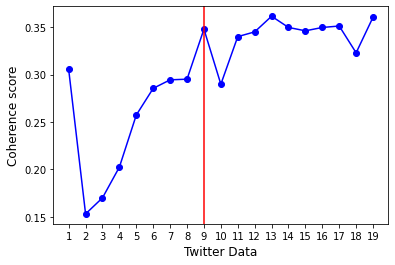

In [7]:
# plot collected coherence scores data

# data series
X = range(1,20, 1)
Y = COHER_VALS

# create figure
FIG = plt.figure(figsize=(6, 4))
AX = FIG.add_subplot(1, 1, 1)

# plot data
AX.plot(X, Y, marker='o', color='b', ls='-')

# axes
AX.set_xlabel("Twitter Data",size=12)
AX.set_ylabel("Coherence score",size=12)

#IMP
AX.set_xticks(np.arange(1, 20, 1))

# reference line
AX.axvline(x=9, ymin=0, ymax=1, color='r')

# grid
#AX.grid(True, ls='--')

# save plot to file
#CWD = CWD
#FOLDER = 'exhibits/appxB'
#FILE = 'B_0.pdf'

plt.savefig('twitter_cohere.pdf',
            transparent=True,
            bbox_inches='tight',
            pad_inches=0)

plt.show()

In [76]:
 plt.savefig("new9topic.pdf",
            transparent=True,
            bbox_inches='tight',
            pad_inches=0)

<Figure size 432x288 with 0 Axes>

In [30]:
# suggested number of topics to retain -- see above
# N_TOPICS = 16

# model estimation
LDA_MALLET2 = gensim.models.wrappers.LdaMallet(MALLET_PATH,
                                              corpus=CORPUS,
                                              num_topics=13,
                                              id2word=DICT,
                                              random_seed=123)

# print results
#LDA_MALLET.print_topics(num_topics=N_TOPICS, num_words=10)

In [33]:
df

,tweet,label,year,original,docs_phrases
0,perfect owners,Electric,2015,#MyFord #Mobile Is a #SmartWatch #App Perfect ...,"[perfect, owner]"
1,exclusive video gms path plans highlights,Electric,2015,#solar Exclusive Video On GM’s Electric Vehicl...,"[exclusive, video, gms, path, plan, highlight]"
2,hong kong announcement worlds biggest rally su...,Electric,2015,@harbourtimes Hong Kong announcement - 2016 wo...,"[hong, kong, announcement, world_big, rally, s..."
3,exclusive video gms path plans highlights,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,...","[exclusive, video, gms, path, plan, highlight]"
4,exclusive video gms path plans highlights orig...,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,...","[exclusive, video, gms, path, plan, highlight,..."
...,...,...,...,...,...
99480,projected barrel oil electrichybrid makers com...,Hybrid,2015,Projected $40/Barrel Oil in 2015. How are elec...,"[project, barrel, oil, maker, communicate, ben..."
99481,affordable also fuel efficient c epaestimated mpg,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...,"[affordable, fuel, efficient, mpg]"
99482,affordable also fuel efficient c epaestimated mpg,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...,"[affordable, fuel, efficient, mpg]"
99483,kick models technology including mondeo,Hybrid,2015,"To kick off 2015, we're looking at all the new...","[kick, model, technology, include, mondeo]"


In [28]:
# suggested number of topics to retain -- see above
N_TOPICS = 9

# model estimation
LDA_MALLET = gensim.models.wrappers.LdaMallet(MALLET_PATH,
                                              corpus=CORPUS,
                                              num_topics=N_TOPICS,
                                              id2word=DICT,
                                              random_seed=123)

# print results
#LDA_MALLET.print_topics(num_topics=N_TOPICS, num_words=10)

In [32]:
LDA_MALLET.print_topics(num_topics=N_TOPICS, num_words=20)

[(0,
  '0.041*"power" + 0.035*"technology" + 0.031*"future" + 0.027*"green" + 0.016*"system" + 0.016*"rt" + 0.015*"tech" + 0.014*"create" + 0.011*"solution" + 0.011*"ready" + 0.010*"work" + 0.010*"join" + 0.009*"develop" + 0.009*"revolution" + 0.008*"follow" + 0.008*"development" + 0.008*"visit" + 0.007*"innovation" + 0.007*"meet" + 0.007*"challenge"'),
 (1,
  '0.024*"cost" + 0.021*"make" + 0.018*"change" + 0.017*"engine" + 0.016*"buy" + 0.015*"low" + 0.012*"price" + 0.012*"extend" + 0.011*"oil" + 0.011*"long" + 0.011*"petrol" + 0.010*"environment" + 0.009*"give" + 0.009*"end" + 0.009*"diesel" + 0.009*"idea" + 0.008*"reason" + 0.008*"battery_component_warranty" + 0.007*"gasoline" + 0.007*"bad"'),
 (2,
  '0.161*"charge" + 0.064*"station" + 0.024*"find" + 0.020*"point" + 0.020*"charger" + 0.019*"city" + 0.016*"network" + 0.016*"mile" + 0.013*"plug" + 0.013*"fast" + 0.010*"bus" + 0.010*"win" + 0.009*"park" + 0.009*"large" + 0.009*"parking" + 0.008*"open" + 0.008*"travel" + 0.008*"public" 

In [31]:
LDA_MALLET2.print_topics(num_topics=13, num_words=10)

[(0,
  '0.061*"power" + 0.044*"energy" + 0.031*"late" + 0.030*"solar" + 0.030*"check" + 0.024*"learn" + 0.024*"system" + 0.020*"find" + 0.017*"extend" + 0.015*"credit"'),
 (1,
  '0.048*"launch" + 0.024*"production" + 0.022*"lead" + 0.020*"startup" + 0.019*"plant" + 0.019*"video" + 0.018*"maker" + 0.015*"win" + 0.014*"chinese" + 0.013*"push"'),
 (2,
  '0.037*"green" + 0.029*"make" + 0.018*"clean" + 0.016*"stop" + 0.015*"switch" + 0.014*"environment" + 0.014*"option" + 0.013*"give" + 0.013*"ride" + 0.012*"idea"'),
 (3,
  '0.025*"drive" + 0.019*"plug" + 0.015*"bus" + 0.015*"find" + 0.014*"turn" + 0.011*"space" + 0.010*"sound" + 0.009*"cool" + 0.009*"hear" + 0.009*"ceo"'),
 (4,
  '0.042*"plan" + 0.030*"unveil" + 0.024*"engine" + 0.023*"announce" + 0.019*"fully" + 0.018*"model" + 0.018*"project" + 0.018*"bring" + 0.018*"develop" + 0.017*"produce"'),
 (5,
  '0.021*"create" + 0.019*"build" + 0.018*"change" + 0.017*"long" + 0.015*"work" + 0.015*"life" + 0.014*"brand" + 0.012*"jaguar" + 0.012*"

### Result visualization with pyLDAvis

### Copy the training model weights from `Mallet` to `Gensim`

In [35]:
# translate topic modeling outcome
LDA_MALLET_G = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(LDA_MALLET)

In [ ]:
# ignore warnings coming from pyLDAvis
import warnings
warnings.filterwarnings('ignore')

# visualizing the outcome of the retained model -- this takes time
pyLDAvis.enable_notebook()
DATA_VIS = pyLDAvis.gensim.prepare(LDA_MALLET_G, CORPUS, DICT, sort_topics=False)
DATA_VIS

In [ ]:
# save pyLDAvis data to json file
pyLDAvis.save_json(DATA_VIS, 'topic_modelling_vis.json')

### Get term-to-topic probabilities

In [36]:
# get top 5 terms per topic
TOP_TERMS_LINE = LDA_MALLET_G.show_topics(num_topics=N_TOPICS, num_words=10)

In [37]:
TOP_TERMS_LINE

[(0,
  '0.041*"power" + 0.035*"technology" + 0.031*"future" + 0.027*"green" + 0.016*"system" + 0.016*"rt" + 0.015*"tech" + 0.014*"create" + 0.011*"solution" + 0.011*"ready"'),
 (1,
  '0.024*"cost" + 0.021*"make" + 0.018*"change" + 0.017*"engine" + 0.016*"buy" + 0.015*"low" + 0.012*"price" + 0.012*"extend" + 0.011*"oil" + 0.011*"long"'),
 (2,
  '0.161*"charge" + 0.064*"station" + 0.024*"find" + 0.020*"point" + 0.020*"charger" + 0.019*"city" + 0.016*"network" + 0.016*"mile" + 0.013*"plug" + 0.013*"fast"'),
 (3,
  '0.034*"plan" + 0.033*"launch" + 0.017*"production" + 0.014*"startup" + 0.014*"unveil" + 0.013*"tax_credit" + 0.013*"build" + 0.013*"plant" + 0.013*"maker" + 0.013*"model"'),
 (4,
  '0.036*"news" + 0.031*"energy" + 0.022*"read" + 0.021*"late" + 0.021*"solar" + 0.020*"free" + 0.019*"offer" + 0.017*"learn" + 0.016*"service" + 0.015*"business"'),
 (5,
  '0.025*"tax" + 0.024*"fuel" + 0.018*"government" + 0.017*"emission" + 0.016*"owner" + 0.015*"state" + 0.014*"increase" + 0.014*"in

In [38]:
# rearrange data on top 10 terms per topic
TOP_TERMS_M = []

for i in TOP_TERMS_LINE:
    topic_num = i[0]
    prob_terms = i[1].split('+')
    for term_sort, term in enumerate(prob_terms):
        weight = float(term.split('*')[0])
        term = term.split('*')[1].strip('"| ')
        TOP_TERMS_M.append([topic_num, term_sort, weight, term])

DF = pd.DataFrame(TOP_TERMS_M)

# rename columns
OLD_NAMES = [0, 1, 2, 3]
NEW_NAMES = ['topic_n', 'term_sort', 'weight', 'term']
COLS = dict(zip(OLD_NAMES, NEW_NAMES))
DF.rename(columns=COLS, inplace=True)
DF.set_index(['term_sort', 'topic_n'], inplace=True)
DF = DF.unstack()

# sidewaystable
DF_H = pd.DataFrame()

###################################################################range
for i in range(9):
    terms = DF['term'][i]
    weights = DF['weight'][i]
    weights = pd.Series(['( %s )' % j for j in weights ])
    DF_H = pd.concat([DF_H, terms, weights], axis=1)


# write data to file
#CWD = CWD
#FOLDER = 'exhibits'
#FILE = '_1.tex'
#DF_H.T.to_latex(os.path.join(CWD, FOLDER, FILE), index=True)

# DF_H.T.to_latex('1.tex', index=True)

In [39]:
DF_H.T.to_latex('Twitter_Try2.tex', index=True)

In [68]:
DF_H.T

,0,1,2,3,4,5,6,7,8,9
0,power,technology,future,energy,solar,change,system,clean,policy,design
0,( 0.041 ),( 0.034 ),( 0.03 ),( 0.03 ),( 0.021 ),( 0.018 ),( 0.016 ),( 0.013 ),( 0.012 ),( 0.012 )
1,charge,station,point,city,find,network,infrastructure,tax_credit,add,include
0,( 0.163 ),( 0.066 ),( 0.02 ),( 0.019 ),( 0.019 ),( 0.017 ),( 0.014 ),( 0.014 ),( 0.012 ),( 0.011 )
2,check,charger,free,offer,rt,service,tech,business,plug,fast
0,( 0.021 ),( 0.02 ),( 0.02 ),( 0.019 ),( 0.017 ),( 0.016 ),( 0.015 ),( 0.015 ),( 0.013 ),( 0.013 )
3,gas,tax,fuel,cost,owner,save,emission,pay,state,low
0,( 0.032 ),( 0.024 ),( 0.023 ),( 0.023 ),( 0.018 ),( 0.017 ),( 0.017 ),( 0.015 ),( 0.014 ),( 0.014 )
4,news,plan,launch,late,unveil,government,production,announce,startup,plant
0,( 0.035 ),( 0.034 ),( 0.033 ),( 0.021 ),( 0.021 ),( 0.018 ),( 0.017 ),( 0.016 ),( 0.014 ),( 0.013 )


In [87]:
DF_H.to_csv('new9topic_topic.csv')

In [80]:
# DF_H.T.to_latex('2.tex', index=True)

### Get document-to-topic probabilities

In [40]:
# get transformed corpus as per the LDA model
TRANSF_CORPUS = LDA_MALLET_G.get_document_topics(CORPUS)

# rearrange data on document-topic pairs probabilities
DOC_TOPIC_M = []

#########################################################################range
for id, doc in enumerate(TRANSF_CORPUS):
    for topic in np.arange(0, 9, 1):
        topic_n = doc[topic][0]
        topic_prob = doc[topic][1] 
        DOC_TOPIC_M.append([id, topic, topic_prob])

DF = pd.DataFrame(DOC_TOPIC_M)

# rename columns
OLD_NAMES = [0, 1, 2]
NEW_NAMES = ['doc_id', 'topic_n', 'prob']
COLS = dict(zip(OLD_NAMES, NEW_NAMES))
DF.rename(columns=COLS, inplace=True)

# dominant topic
GR = DF.groupby('doc_id')
DF.loc[:, 'max'] = GR['prob'].transform(np.max)
DF.loc[:, 'first_topic'] = 0
DF.loc[DF['prob'] == DF['max'], 'first_topic'] = 1
FIRST_TOPIC = DF.loc[DF['first_topic'] == 1]

# arrange data as contingency table
DF = DF.pivot_table(index='doc_id', columns='topic_n', values='prob', aggfunc=np.mean)

# write data to file
#CWD = CWD
#FOLDER = 'transformed_data'
#FILE = 'transformed_corpus.csv'
# DF.to_csv('new6topic.csv', index=True)

In [41]:
DF.to_csv('Twitter_try2_Prob.csv', index=True)

In [94]:
DF

topic_n,0,1,2,3,4,5,6,7,8
doc_id,,,,,,,,,
0,0.107832,0.104836,0.158401,0.104822,0.104822,0.104822,0.104822,0.104822,0.104822
1,0.116030,0.111941,0.121399,0.102881,0.121399,0.102881,0.117707,0.102881,0.102881
2,0.130270,0.096610,0.095785,0.095785,0.113027,0.095785,0.113027,0.112202,0.147507
3,0.107468,0.140255,0.140255,0.107468,0.091075,0.123825,0.091075,0.107468,0.091111
4,0.102881,0.102881,0.102881,0.139918,0.102881,0.121197,0.121602,0.102881,0.102881
...,...,...,...,...,...,...,...,...,...
44713,0.177774,0.116239,0.100855,0.093178,0.085777,0.100858,0.093147,0.131317,0.100855
44714,0.096498,0.112700,0.113027,0.113027,0.095785,0.130595,0.130268,0.112314,0.095785
44715,0.146659,0.126608,0.094242,0.145294,0.097444,0.092455,0.101927,0.105735,0.089638


#  plot

### wordclouds

https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-2-602ffb38d396

In [42]:
tm_results = LDA_MALLET[CORPUS]

In [43]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in tm_results]

In [44]:
topics = [[(term, round(wt, 3))
           for term, wt in LDA_MALLET.show_topic(n, topn=20)]
          for n in range(0, LDA_MALLET.num_topics)]

In [45]:
topics_df = pd.DataFrame(
    [[term for term, wt in topic] for topic in topics],
    columns=['Term' + str(i) for i in range(1, 21)],
    index=['Topic ' + str(t) for t in range(1, LDA_MALLET.num_topics + 1)]).T
topics_df.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
Term1,power,cost,charge,plan,news,tax,gas,battery,sale
Term2,technology,make,station,launch,energy,fuel,save,check,market
Term3,future,change,find,production,read,government,pay,design,industry
Term4,green,engine,point,startup,late,emission,lot,price,global
Term5,system,buy,charger,unveil,solar,owner,stop,fully,sell


In [46]:
topics_df.head(10)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
Term1,power,cost,charge,plan,news,tax,gas,battery,sale
Term2,technology,make,station,launch,energy,fuel,save,check,market
Term3,future,change,find,production,read,government,pay,design,industry
Term4,green,engine,point,startup,late,emission,lot,price,global
Term5,system,buy,charger,unveil,solar,owner,stop,fully,sell
Term6,rt,low,city,tax_credit,free,state,money,video,drive
Term7,tech,price,network,build,offer,increase,switch,concept,report
Term8,create,extend,mile,plant,learn,infrastructure,live,reveal,lead
Term9,solution,oil,plug,maker,service,purchase,run,cheap,demand
Term10,ready,long,fast,model,business,driver,turn,world,share


In [47]:
# set column width
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame(
    [', '.join([term for term, wt in topic]) for topic in topics],
    columns=['Terms per Topic'],
    index=['Topic' + str(t) for t in range(1, LDA_MALLET.num_topics + 1)])
topics_df

,Terms per Topic
Topic1,"power, technology, future, green, system, rt, tech, create, solution, ready, work, join, develop, revolution, follow, development, visit, innovation, meet, challenge"
Topic2,"cost, make, change, engine, buy, low, price, extend, oil, long, petrol, environment, give, end, diesel, idea, reason, battery_component_warranty, gasoline, bad"
Topic3,"charge, station, find, point, charger, city, network, mile, plug, fast, bus, win, park, large, parking, open, travel, public, install, corridor"
Topic4,"plan, launch, production, startup, unveil, tax_credit, build, plant, maker, model, project, produce, invest, announce, fusion, chinese, brand, start, push, automaker"
Topic5,"news, energy, read, late, solar, free, offer, learn, service, business, fleet, post, add, credit, month, bring, base, feature, story, article"
Topic6,"tax, fuel, government, emission, owner, state, increase, infrastructure, purchase, driver, clean, reduce, support, policy, include, option, incentive, cut, provide, program"
Topic7,"gas, save, pay, lot, stop, money, switch, live, run, turn, ride, problem, speed, spend, easy, hear, thing, afford, trip, feel"
Topic8,"battery, check, design, price, fully, video, concept, reveal, cheap, world, review, heres, life, run, watch, luxury, jaguar, call, race, km"
Topic9,"sale, market, industry, global, sell, drive, report, lead, demand, share, set, manufacturer, target, grow, growth, expect, reach, research, hit, metal"


In [83]:
topics_df.to_csv('topics_df.csv')

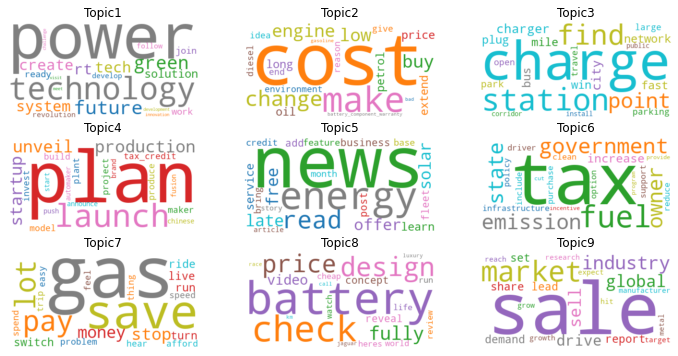

In [50]:
# import wordclouds
from wordcloud import WordCloud

# initiate wordcloud object
wc = WordCloud(background_color="white", colormap="tab10", max_font_size=150, random_state=42)

# set the figure size
plt.rcParams['figure.figsize'] = [12, 6]

# Create subplots for each topic
for i in range(9):

    wc.generate(text=topics_df["Terms per Topic"][i])
    
    plt.subplot(3, 3, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])
    

plt.savefig('topic wordclouds126.pdf',
            transparent=True,
            bbox_inches='tight',
            pad_inches=0)

plt.show()

In [80]:
plt.savefig('topic wordclouds126.pdf',
            transparent=True,
            bbox_inches='tight',
            pad_inches=0)

<Figure size 864x432 with 0 Axes>

### Dominant Topics for Each Document

In [51]:
# create a dataframe
corpus_topic_df = pd.DataFrame()
# get the Titles from the original dataframe
corpus_topic_df['Tweet Index'] = df.index
corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df['Topic Terms'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]
corpus_topic_df.head()


,Tweet Index,Dominant Topic,Contribution %,Topic Terms
0,0,6,12.61,"tax, fuel, government, emission, owner, state, increase, infrastructure, purchase, driver, clean, reduce, support, policy, include, option, incentive, cut, provide, program"
1,1,5,16.87,"news, energy, read, late, solar, free, offer, learn, service, business, fleet, post, add, credit, month, bring, base, feature, story, article"
2,2,5,18.85,"news, energy, read, late, solar, free, offer, learn, service, business, fleet, post, add, credit, month, bring, base, feature, story, article"
3,3,5,16.47,"news, energy, read, late, solar, free, offer, learn, service, business, fleet, post, add, credit, month, bring, base, feature, story, article"
4,4,5,20.34,"news, energy, read, late, solar, free, offer, learn, service, business, fleet, post, add, credit, month, bring, base, feature, story, article"


In [107]:
dominant_topic_df = corpus_topic_df.groupby(['Dominant Topic']).agg(
    Doc_Count=('Dominant Topic', np.size)).reset_index()
dominant_topic_df['Total_Docs_Percentage']=dominant_topic_df['Doc_Count']
dominant_topic_df['Total_Docs_Percentage'] = dominant_topic_df[
    'Total_Docs_Percentage'].apply(lambda row: round((row * 100) / len(CORPUS), 2))

In [89]:
dominant_topic_df

,Dominant Topic,Doc_Count,Total_Docs_Percentage
0,1,14388,14.46
1,2,12737,12.80
2,3,12251,12.31
3,4,11870,11.93
4,5,9603,9.65
5,6,8989,9.04
6,7,10204,10.26
7,8,9700,9.75
8,9,9743,9.79


In [146]:
dominant_topic_df_merge=dominant_topic_df

In [149]:
dominant_topic_df_merge.loc[1,:]=dominant_topic_df_merge.loc[1,:]+dominant_topic_df_merge.loc[6,:]

In [150]:
dominant_topic_df_merge.loc[3,:]=dominant_topic_df_merge.loc[3,:]+dominant_topic_df_merge.loc[4,:]

In [155]:
dominant_topic_df_merge.drop([4,6],inplace=True)

In [111]:
dominant_topic_df_merge.to_csv('dominant_topic_df_merge.csv',index=True)

In [138]:
topic_name = [
    'Energy Technology', 'Cost', 'Charging Station',
    'News Releases',
    'Government Policy', 'Battery', 'Market Overview'
]

In [125]:
dominant_topic_df_merge.reset_index(inplace=True)

In [159]:
dominant_topic_df_merge.loc[1,'Total_Docs_Percentage']=round(dominant_topic_df_merge.loc[1,'Total_Docs_Percentage'],2)

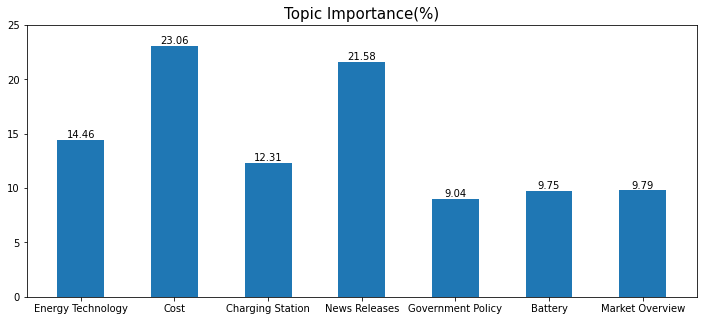

In [234]:
fig, ax = plt.subplots(figsize=(12,5))

bar_plot = plt.bar(x=[0, 1, 2, 3, 4, 5, 6],
                   height=dominant_topic_df_merge.Total_Docs_Percentage.values.tolist(),
                   data=dominant_topic_df,
                   width=.5,
                   tick_label=topic_name)


ax.set_title('Topic Importance(%)',
             fontdict=dict(size=15))
#ax.set_xlabel('Topic')
#ax.set_ylabel('Average Weights(%)')


bar_label = dominant_topic_df_merge.Total_Docs_Percentage.values.tolist()

plt.ylim(0, 25)


def autolabel(rects):
    for idx, rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2.,
                1.0 * height,
                bar_label[idx],
                ha='center',
                va='bottom',
                rotation=0)


autolabel(bar_plot)

plt.savefig('forum_topic_contribution_merge155.pdf',
            transparent=True,
            bbox_inches='tight',
            pad_inches=0)
plt.show()

In [144]:
dominant_topic_df

,Dominant Topic,Doc_Count,Total_Docs_Percentage
0,1,14388,14.46
1,2,12737,12.80
2,3,12251,12.31
3,4,11870,11.93
4,5,9603,9.65
5,6,8989,9.04
6,7,10204,10.26
7,8,9700,9.75
8,9,9743,9.79


In [152]:
dominant_topic_df_merge

,Dominant Topic,Doc_Count,Total_Docs_Percentage
0,1.0,14388.0,14.46
1,9.0,22941.0,23.06
2,3.0,12251.0,12.31
3,9.0,21473.0,21.58
4,5.0,9603.0,9.65
5,6.0,8989.0,9.04
6,7.0,10204.0,10.26
7,8.0,9700.0,9.75
8,9.0,9743.0,9.79


In [84]:
corpus_topic_df.to_csv('corpus_topic_df.csv')

## plot1

In [54]:
df_weights = pd.DataFrame.from_records([{v: k for v, k in row} for row in tm_results])
df_weights.columns = ['Topic ' + str(i) for i in range(1,10)]
df_weights

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
0,0.106838,0.106838,0.106838,0.106838,0.106838,0.126068,0.119658,0.113248,0.106838
1,0.099206,0.099206,0.099206,0.119048,0.168651,0.099206,0.099206,0.117063,0.099206
2,0.105159,0.099206,0.099206,0.111111,0.188492,0.099206,0.099206,0.099206,0.099206
3,0.099206,0.099206,0.099206,0.123016,0.164683,0.099206,0.099206,0.117063,0.099206
4,0.103578,0.094162,0.094162,0.111111,0.203390,0.094162,0.094162,0.111111,0.094162
...,...,...,...,...,...,...,...,...,...
99480,0.097466,0.155945,0.097466,0.150097,0.097466,0.109162,0.097466,0.097466,0.097466
99481,0.102881,0.125514,0.102881,0.102881,0.102881,0.139918,0.102881,0.117284,0.102881
99482,0.102881,0.131687,0.102881,0.102881,0.102881,0.139918,0.102881,0.111111,0.102881
99483,0.137374,0.101010,0.101010,0.119192,0.101010,0.137374,0.101010,0.101010,0.101010


In [55]:
df_weights['Year'] = df.year
df_weights.groupby('Year').mean()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
Year,,,,,,,,,
2015,0.110541,0.110439,0.111580,0.111707,0.111435,0.109627,0.110434,0.112872,0.111365
2016,0.111317,0.108807,0.114722,0.111902,0.110577,0.109747,0.108713,0.112078,0.112138
2017,0.111730,0.110637,0.110330,0.114076,0.110302,0.110296,0.109951,0.110704,0.111973
2018,0.111344,0.111178,0.109784,0.108264,0.112747,0.112653,0.111333,0.110276,0.112421
2019,0.110842,0.113467,0.109376,0.110303,0.110132,0.112435,0.114467,0.109937,0.109041


In [56]:
df_weights_year=df_weights.groupby('Year').mean()

In [57]:
df_weights_year

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
Year,,,,,,,,,
2015,0.110541,0.110439,0.111580,0.111707,0.111435,0.109627,0.110434,0.112872,0.111365
2016,0.111317,0.108807,0.114722,0.111902,0.110577,0.109747,0.108713,0.112078,0.112138
2017,0.111730,0.110637,0.110330,0.114076,0.110302,0.110296,0.109951,0.110704,0.111973
2018,0.111344,0.111178,0.109784,0.108264,0.112747,0.112653,0.111333,0.110276,0.112421
2019,0.110842,0.113467,0.109376,0.110303,0.110132,0.112435,0.114467,0.109937,0.109041


In [58]:
df_weights_year_plot=round(df_weights_year*100,2)
df_weights_year_plot

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
Year,,,,,,,,,
2015,11.05,11.04,11.16,11.17,11.14,10.96,11.04,11.29,11.14
2016,11.13,10.88,11.47,11.19,11.06,10.97,10.87,11.21,11.21
2017,11.17,11.06,11.03,11.41,11.03,11.03,11.00,11.07,11.20
2018,11.13,11.12,10.98,10.83,11.27,11.27,11.13,11.03,11.24
2019,11.08,11.35,10.94,11.03,11.01,11.24,11.45,10.99,10.90


In [86]:
df_weights_year_plot.to_csv('df_weights_year_plot.csv',index=True)

## plot2

In [59]:
df_weights['Dominant'] = df_weights.drop('Year', axis=1).idxmax(axis=1)
df_weights.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Year,Dominant
0,0.106838,0.106838,0.106838,0.106838,0.106838,0.126068,0.119658,0.113248,0.106838,2015,Topic 6
1,0.099206,0.099206,0.099206,0.119048,0.168651,0.099206,0.099206,0.117063,0.099206,2015,Topic 5
2,0.105159,0.099206,0.099206,0.111111,0.188492,0.099206,0.099206,0.099206,0.099206,2015,Topic 5
3,0.099206,0.099206,0.099206,0.123016,0.164683,0.099206,0.099206,0.117063,0.099206,2015,Topic 5
4,0.103578,0.094162,0.094162,0.111111,0.203390,0.094162,0.094162,0.111111,0.094162,2015,Topic 5


In [68]:
df['Dominant'] = df_weights['Dominant']

In [69]:
df

,tweet,label,year,original,docs_phrases,Dominant
0,perfect owners,Electric,2015,#MyFord #Mobile Is a #SmartWatch #App Perfect for Electric Vehicle Owners #tech #science http://techmuff.com/?p=108&Nbdm pic.twitter.com/VxCIFGVwzi,"[perfect, owner]",Topic 6
1,exclusive video gms path plans highlights,Electric,2015,"#solar Exclusive Video On GM’s Electric Vehicle Path, Plans, & Highlights http://ow.ly/39zLbx","[exclusive, video, gms, path, plan, highlight]",Topic 5
2,hong kong announcement worlds biggest rally sustainability worldreachpr,Electric,2015,@harbourtimes Hong Kong announcement - 2016 world’s biggest electric vehicle rally for sustainability - more worldreachpr@gmail.com,"[hong, kong, announcement, world_big, rally, sustainability]",Topic 5
3,exclusive video gms path plans highlights,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path, Plans, & Highlights http://fb.me/Xnal2Awt","[exclusive, video, gms, path, plan, highlight]",Topic 5
4,exclusive video gms path plans highlights originally published ob,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path, Plans, & Highlights: Originally published on EV Ob... http://bit.ly/1NSqV9C #solar #tech","[exclusive, video, gms, path, plan, highlight, originally, publish, ob]",Topic 5
...,...,...,...,...,...,...
99480,projected barrel oil electrichybrid makers communicate benefits ownership,Hybrid,2015,Projected $40/Barrel Oil in 2015. How are electric/hybrid vehicle makers going to communicate the benefits of ownership? #businesschallenge,"[project, barrel, oil, maker, communicate, benefit, ownership]",Topic 2
99481,affordable also fuel efficient c epaestimated mpg,Hybrid,2015,Toyota's most affordable hybrid vehicle is also its most fuel efficient. The Prius c with EPA-estimated 53 MPG... http://fb.me/3tdidNed8,"[affordable, fuel, efficient, mpg]",Topic 6
99482,affordable also fuel efficient c epaestimated mpg,Hybrid,2015,Toyota's most affordable hybrid vehicle is also its most fuel efficient. The Prius c with EPA-estimated 53 MPG... http://fb.me/4tKZlKmOg,"[affordable, fuel, efficient, mpg]",Topic 6
99483,kick models technology including mondeo,Hybrid,2015,"To kick off 2015, we're looking at all the new models and Ford technology... including the new Mondeo Hybrid vehicle http://ow.ly/GwQnL","[kick, model, technology, include, mondeo]",Topic 1


In [ ]:
df_journals_plot_merge['Topic 2']=df_journals_plot_merge['Topic 2']+df_journals_plot_merge['Topic 7']
df_journals_plot_merge['Topic 4']=df_journals_plot_merge['Topic 4']+df_journals_plot_merge['Topic 5']
df_journals_plot_merge=round(df_journals_plot_merge.drop(['Topic 5','Topic 7'],axis=1),2)

In [60]:
df_dominance = df_weights.groupby('Year')['Dominant'].value_counts(normalize=True).unstack()
df_dominance

Dominant,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
Year,,,,,,,,,
2015,0.147433,0.120265,0.118274,0.120323,0.106915,0.071140,0.097020,0.115288,0.103343
2016,0.156938,0.095329,0.176366,0.122874,0.094422,0.069467,0.063596,0.109317,0.111692
2017,0.151971,0.132796,0.102074,0.162093,0.085109,0.084254,0.090883,0.087105,0.103714
2018,0.141771,0.128928,0.108042,0.079613,0.116646,0.111658,0.106359,0.093890,0.113092
2019,0.131243,0.155750,0.102177,0.117155,0.086547,0.109409,0.140291,0.084696,0.072734


In [61]:
df_dominance_plot=round(df_dominance*100,2)

In [87]:
df_dominance_plot.to_csv('df_dominance_plot.csv',index=True)

In [229]:
df_dominance_plot_merge=df_dominance_plot

In [230]:
df_dominance_plot_merge['Topic 2']=df_dominance_plot_merge['Topic 2']+df_dominance_plot_merge['Topic 7']
df_dominance_plot_merge['Topic 4']=df_dominance_plot_merge['Topic 4']+df_dominance_plot_merge['Topic 5']
df_dominance_plot_merge=round(df_dominance_plot_merge.drop(['Topic 5','Topic 7'],axis=1),2)

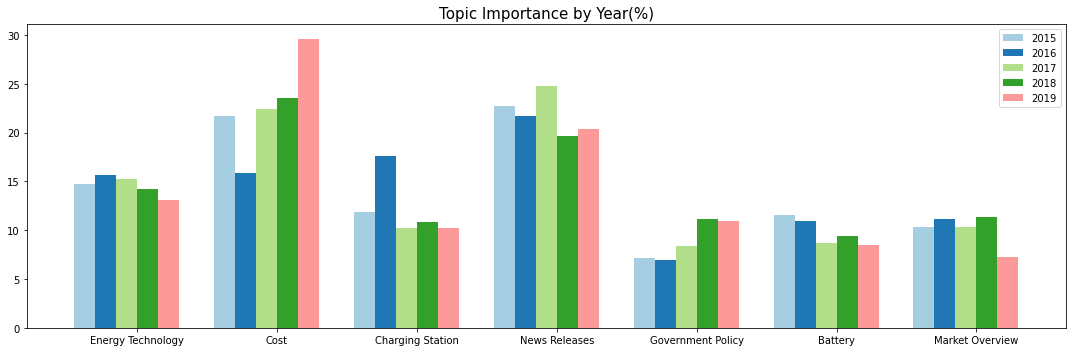

In [232]:
#merge
y2015 = df_dominance_plot_merge.loc[2015].values
y2016 = df_dominance_plot_merge.loc[2016].values
y2017 = df_dominance_plot_merge.loc[2017].values
y2018 = df_dominance_plot_merge.loc[2018].values
y2019 = df_dominance_plot_merge.loc[2019].values

x = np.arange(len(topic_name))  # the label locations
width = 0.15  # the width of the bars

fig=plt.figure(figsize=(15,5))

ax = fig.add_subplot(1, 1, 1)
rects1 = ax.bar(x - 0.375, y2015, width, label='2015',color=plt.cm.get_cmap('Paired')(0))
rects2 = ax.bar(x - 0.225, y2016, width, label='2016',color=plt.cm.get_cmap('Paired')(1))
rects3 = ax.bar(x-0.075, y2017, width, label='2017',color=plt.cm.get_cmap('Paired')(2))
rects4 = ax.bar(x + 0.075, y2018, width, label='2018',color=plt.cm.get_cmap('Paired')(3))
rects5 = ax.bar(x + 0.225,y2019, width, label='2019',color=plt.cm.get_cmap('Paired')(4))

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Average Weights of Topics(%)')
ax.set_title("Topic Importance by Year(%)", 
              fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(topic_name)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 6, height),
                    xytext=(5, 3),  # 3 points vertical offset
                    fontsize=8, color='black',
                    textcoords="offset points",
                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)
#autolabel(rects4)
#autolabel(rects5)

fig.tight_layout()

plt.savefig('year_topic_contribution155_merge.pdf',
            transparent=True,
            bbox_inches='tight',
            pad_inches=0)

plt.show()

#fig.savefig("Frequency.png", format = 'png' )

In [ ]:
rects1 = ax.bar(x - 0.375, y2015, width, label='2015',alpha=0.9,color=plt.cm.get_cmap('Set3')(0))
rects2 = ax.bar(x - 0.225, y2016, width, label='2016',alpha=0.9,color=plt.cm.get_cmap('Set3')(1))
rects3 = ax.bar(x-0.075, y2017, width, label='2017',alpha=0.8,color=plt.cm.get_cmap('Set3')(2))
rects4 = ax.bar(x + 0.075, y2018, width, label='2018',alpha=0.7,color=plt.cm.get_cmap('Set3')(3))
rects5 = ax.bar(x + 0.225,y2019, width, label='2019',alpha=0.7,color=plt.cm.get_cmap('Set3')(4))


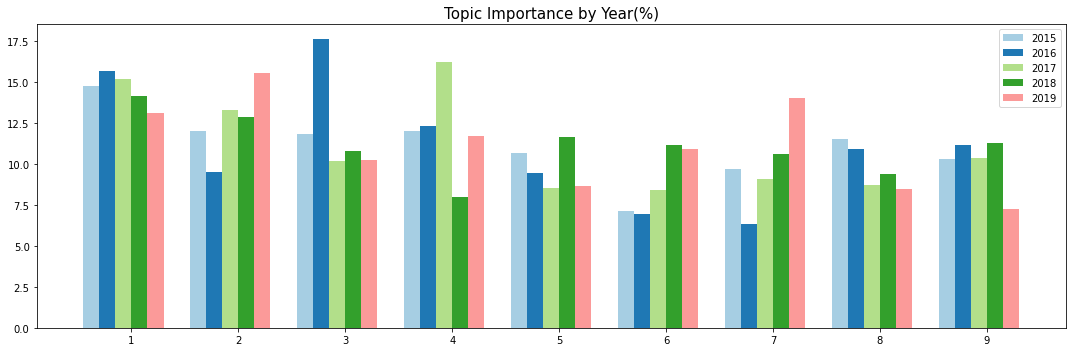

In [143]:
labels = [i+1 for i in range(9)]
y2015 = df_dominance_plot.loc[2015].values
y2016 = df_dominance_plot.loc[2016].values
y2017 = df_dominance_plot.loc[2017].values
y2018 = df_dominance_plot.loc[2018].values
y2019 = df_dominance_plot.loc[2019].values

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig=plt.figure(figsize=(15,5))

ax = fig.add_subplot(1, 1, 1)
rects1 = ax.bar(x - 0.375, y2015, width, label='2015',color=plt.cm.get_cmap('Paired')(0))
rects2 = ax.bar(x - 0.225, y2016, width, label='2016',color=plt.cm.get_cmap('Paired')(1))
rects3 = ax.bar(x-0.075, y2017, width, label='2017',color=plt.cm.get_cmap('Paired')(2))
rects4 = ax.bar(x + 0.075, y2018, width, label='2018',color=plt.cm.get_cmap('Paired')(3))
rects5 = ax.bar(x + 0.225,y2019, width, label='2019',color=plt.cm.get_cmap('Paired')(4))

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Average Weights of Topics(%)')
ax.set_title("Topic Importance by Year(%)", 
              fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 6, height),
                    xytext=(5, 3),  # 3 points vertical offset
                    fontsize=8, color='black',
                    textcoords="offset points",
                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)
#autolabel(rects4)
#autolabel(rects5)

fig.tight_layout()

#plt.savefig('year_topic_contribution155.pdf',
#            transparent=True,
#            bbox_inches='tight',
#            pad_inches=0)

plt.show()

#fig.savefig("Frequency.png", format = 'png' )

## plot 3

In [64]:
df_weights['label']=df.label

In [65]:
df_journals = df_weights.groupby(['label', 'Year'])['Dominant'].value_counts(normalize=True).unstack()
df_journals.head(15)

Dominant        Topic 1   Topic 2   Topic 3   Topic 4   Topic 5   Topic 6  \
label    Year                                                               
Electric 2015  0.129624  0.059417  0.210062  0.135650  0.113789  0.080157   
         2016  0.140304  0.060532  0.254234  0.144340  0.092167  0.079052   
         2017  0.146932  0.095900  0.144352  0.178899  0.082999  0.091170   
         2018  0.122576  0.075623  0.172992  0.107618  0.141967  0.120083   
         2019  0.128936  0.130876  0.122370  0.130578  0.077053  0.114858   
Hybrid   2015  0.160213  0.163934  0.052399  0.109323  0.101981  0.064669   
         2016  0.181799  0.147334  0.059989  0.090792  0.097792  0.055143   
         2017  0.156954  0.169290  0.060258  0.145470  0.087197  0.077414   
         2018  0.157483  0.172562  0.054875  0.056689  0.095918  0.104762   
         2019  0.136354  0.210869  0.057429  0.087412  0.107584  0.097332   

Dominant        Topic 7   Topic 8   Topic 9  
label    Year                                
Electric 2015  0.072590  0.091508  0.107203  
         2016  0.038913  0.097572  0.092888  
         2017  0.049599  0.074398  0.135751  
         2018  0.059418  0.095429  0.104294  
         2019  0.127394  0.089141  0.078794  
Hybrid   2015  0.114553  0.132354  0.100573  
         2016  0.100485  0.126871  0.139795  
         2017  0.131717  0.099674  0.072026  
         2018  0.144785  0.092630  0.120295  
         2019  0.168871  0.074846  0.059303

In [71]:
df_journals_plot=round(df_journals*100,2)

In [85]:
df_journals_plot.to_csv('df_journals_plot.csv',index=True)

In [207]:
df_journals_plot_merge

Dominant       Topic 1  Topic 2  Topic 3  Topic 4  Topic 6  Topic 8  Topic 9
label    Year                                                               
Electric 2015  12.96    20.46    21.01    36.33    8.02     9.15     10.72  
         2016  14.03    13.83    25.42    32.87    7.91     9.76     9.29   
         2017  14.69    19.51    14.44    34.49    9.12     7.44     13.58  
         2018  12.26    19.44    17.30    39.16    12.01    9.54     10.43  
         2019  12.89    38.57    12.24    28.48    11.49    8.91     7.88   
Hybrid   2015  16.02    39.31    5.24     31.33    6.47     13.24    10.06  
         2016  18.18    34.83    6.00     28.64    5.51     12.69    13.98  
         2017  15.70    43.27    6.03     31.99    7.74     9.97     7.20   
         2018  15.75    46.22    5.49     24.85    10.48    9.26     12.03  
         2019  13.64    54.87    5.74     30.26    9.73     7.48     5.93

In [203]:
df_journals_plot_merge=df_journals_plot

In [206]:
df_journals_plot_merge['Topic 2']=df_journals_plot_merge['Topic 2']+df_journals_plot_merge['Topic 7']
df_journals_plot_merge['Topic 4']=df_journals_plot_merge['Topic 4']+df_journals_plot_merge['Topic 5']
df_journals_plot_merge=round(df_journals_plot_merge.drop(['Topic 5','Topic 7'],axis=1),2)

In [210]:
y2015

array([12.96, 20.46, 21.01, 36.33,  8.02,  9.15, 10.72])

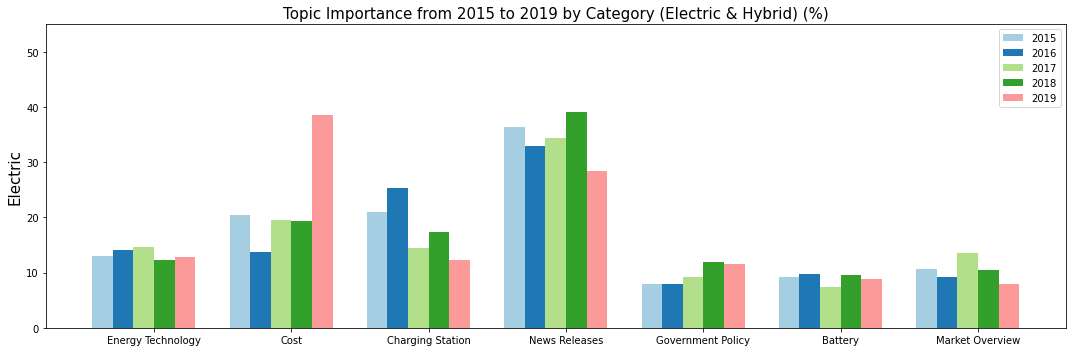

In [226]:
#merge
#Electric
labels = [i+1 for i in range(9)]
y2015 = df_journals_plot_merge.loc['Electric',2015].values
y2016 = df_journals_plot_merge.loc['Electric',2016].values
y2017 = df_journals_plot_merge.loc['Electric',2017].values
y2018 = df_journals_plot_merge.loc['Electric',2018].values
y2019 = df_journals_plot_merge.loc['Electric',2019].values

x = np.arange(len(topic_name))  # the label locations
width = 0.15  # the width of the bars

fig=plt.figure(figsize=(15,5))

ax = fig.add_subplot(1, 1, 1)
rects1 = ax.bar(x - 0.375, y2015, width, label='2015',color=plt.cm.get_cmap('Paired')(0))
rects2 = ax.bar(x - 0.225, y2016, width, label='2016',color=plt.cm.get_cmap('Paired')(1))
rects3 = ax.bar(x-0.075, y2017, width, label='2017',color=plt.cm.get_cmap('Paired')(2))
rects4 = ax.bar(x + 0.075, y2018, width, label='2018',color=plt.cm.get_cmap('Paired')(3))
rects5 = ax.bar(x + 0.225,y2019, width, label='2019',color=plt.cm.get_cmap('Paired')(4))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Electric',fontsize=15)
ax.set_title("Topic Importance from 2015 to 2019 by Category (Electric & Hybrid) (%)", 
              fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(topic_name)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 6, height),
                    xytext=(5, 3),  # 3 points vertical offset
                    fontsize=8, color='black',
                    textcoords="offset points",
                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)
#autolabel(rects4)
#autolabel(rects5)

plt.ylim(0,55)

fig.tight_layout()

plt.savefig('Electric_topic_contribution155_merge.pdf',
            transparent=True,
            bbox_inches='tight',
            pad_inches=0)

plt.show()

#fig.savefig("Frequency.png", format = 'png' )

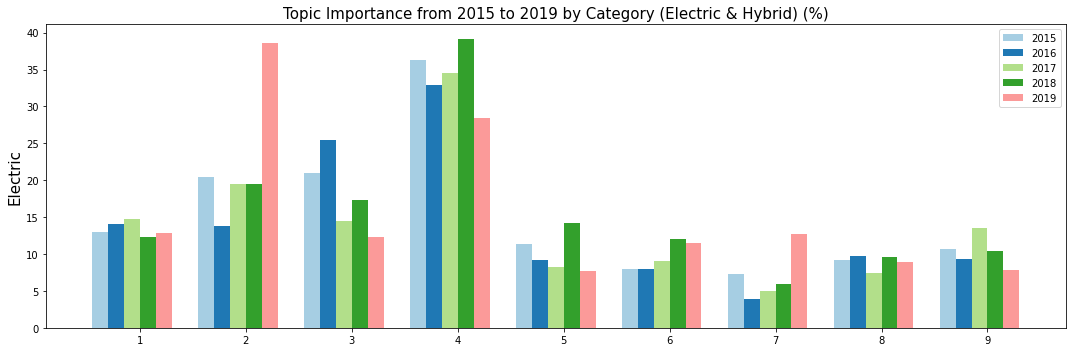

In [227]:
#Electric
labels = [i+1 for i in range(9)]
y2015 = df_journals_plot.loc['Electric',2015].values
y2016 = df_journals_plot.loc['Electric',2016].values
y2017 = df_journals_plot.loc['Electric',2017].values
y2018 = df_journals_plot.loc['Electric',2018].values
y2019 = df_journals_plot.loc['Electric',2019].values

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig=plt.figure(figsize=(15,5))

ax = fig.add_subplot(1, 1, 1)
rects1 = ax.bar(x - 0.375, y2015, width, label='2015',color=plt.cm.get_cmap('Paired')(0))
rects2 = ax.bar(x - 0.225, y2016, width, label='2016',color=plt.cm.get_cmap('Paired')(1))
rects3 = ax.bar(x-0.075, y2017, width, label='2017',color=plt.cm.get_cmap('Paired')(2))
rects4 = ax.bar(x + 0.075, y2018, width, label='2018',color=plt.cm.get_cmap('Paired')(3))
rects5 = ax.bar(x + 0.225,y2019, width, label='2019',color=plt.cm.get_cmap('Paired')(4))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Electric',fontsize=15)
ax.set_title("Topic Importance from 2015 to 2019 by Category (Electric & Hybrid) (%)", 
              fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 6, height),
                    xytext=(5, 3),  # 3 points vertical offset
                    fontsize=8, color='black',
                    textcoords="offset points",
                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)
#autolabel(rects4)
#autolabel(rects5)

fig.tight_layout()

plt.savefig('Electric_topic_contribution155.pdf',
            transparent=True,
            bbox_inches='tight',
            pad_inches=0)

plt.show()

#fig.savefig("Frequency.png", format = 'png' )

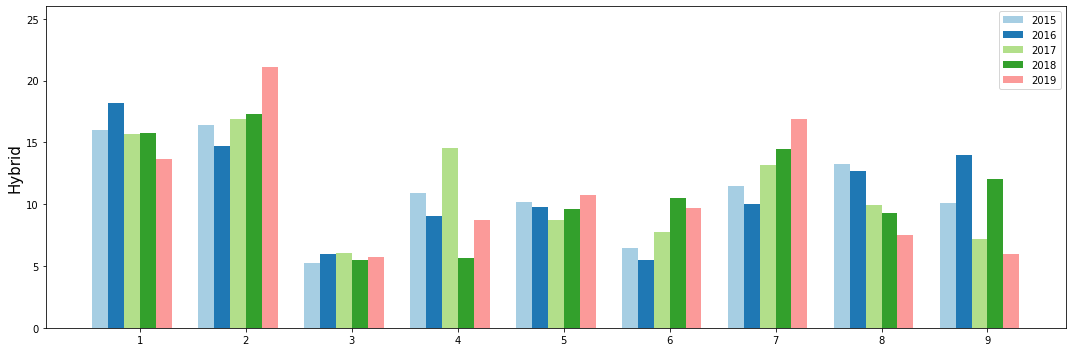

In [169]:
#Hybrid
labels = [i+1 for i in range(9)]
y2015 = df_journals_plot.loc['Hybrid',2015].values
y2016 = df_journals_plot.loc['Hybrid',2016].values
y2017 = df_journals_plot.loc['Hybrid',2017].values
y2018 = df_journals_plot.loc['Hybrid',2018].values
y2019 = df_journals_plot.loc['Hybrid',2019].values

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig=plt.figure(figsize=(15,5))

ax = fig.add_subplot(1, 1, 1)
rects1 = ax.bar(x - 0.375, y2015, width, label='2015',color=plt.cm.get_cmap('Paired')(0))
rects2 = ax.bar(x - 0.225, y2016, width, label='2016',color=plt.cm.get_cmap('Paired')(1))
rects3 = ax.bar(x-0.075, y2017, width, label='2017',color=plt.cm.get_cmap('Paired')(2))
rects4 = ax.bar(x + 0.075, y2018, width, label='2018',color=plt.cm.get_cmap('Paired')(3))
rects5 = ax.bar(x + 0.225,y2019, width, label='2019',color=plt.cm.get_cmap('Paired')(4))


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Hybrid',fontsize=15)
#ax.set_title("Average Weights of Topics For Hybrid from 2015 to 2019", fontsize=10)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.ylim(0,25)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 6, height),
                    xytext=(5, 3),  # 3 points vertical offset
                    fontsize=8, color='black',
                    textcoords="offset points",
                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)
#autolabel(rects4)
#autolabel(rects5)

fig.tight_layout()

#plt.savefig('Hybrid_topic_contribution155.pdf',
#            transparent=True,
#            bbox_inches='tight',
#            pad_inches=0)


plt.show()

#fig.savefig("Frequency.png", format = 'png' )

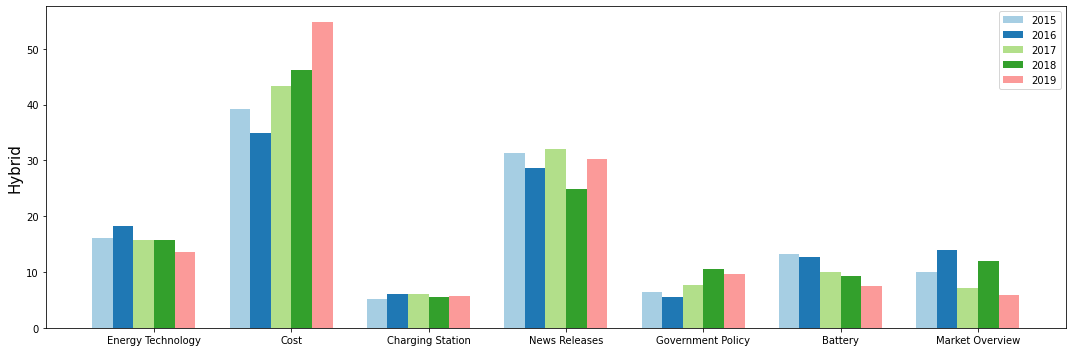

In [221]:
#merge
#Electric
labels = [i+1 for i in range(9)]
y2015 = df_journals_plot_merge.loc['Hybrid',2015].values
y2016 = df_journals_plot_merge.loc['Hybrid',2016].values
y2017 = df_journals_plot_merge.loc['Hybrid',2017].values
y2018 = df_journals_plot_merge.loc['Hybrid',2018].values
y2019 = df_journals_plot_merge.loc['Hybrid',2019].values

x = np.arange(len(topic_name))  # the label locations
width = 0.15  # the width of the bars

fig=plt.figure(figsize=(15,5))

ax = fig.add_subplot(1, 1, 1)
rects1 = ax.bar(x - 0.375, y2015, width, label='2015',color=plt.cm.get_cmap('Paired')(0))
rects2 = ax.bar(x - 0.225, y2016, width, label='2016',color=plt.cm.get_cmap('Paired')(1))
rects3 = ax.bar(x-0.075, y2017, width, label='2017',color=plt.cm.get_cmap('Paired')(2))
rects4 = ax.bar(x + 0.075, y2018, width, label='2018',color=plt.cm.get_cmap('Paired')(3))
rects5 = ax.bar(x + 0.225,y2019, width, label='2019',color=plt.cm.get_cmap('Paired')(4))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Hybrid',fontsize=15)
#ax.set_title("Topic Importance from 2015 to 2019 by Category (Electric & Hybrid) (%)", 
#              fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(topic_name)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 6, height),
                    xytext=(5, 3),  # 3 points vertical offset
                    fontsize=8, color='black',
                    textcoords="offset points",
                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)
#autolabel(rects4)
#autolabel(rects5)

fig.tight_layout()

plt.savefig('Hybrid_topic_contribution155_merge.pdf',
            transparent=True,
            bbox_inches='tight',
            pad_inches=0)

plt.show()

#fig.savefig("Frequency.png", format = 'png' )

## plot4

In [76]:
corpus_topic_df.loc[0:355337,'Label']='Electric'
corpus_topic_df.loc[55338:,'Label']='Hybrid'

# ev_bar=dominant_topic_df.loc[dominant_topic_df['Label']=='Electric','Doc_Count']
# hy_bar=dominant_topic_df.loc[dominant_topic_df['Label']=='Hybrid','Doc_Count']

In [77]:
#split
dominant_topic_df2 = corpus_topic_df.groupby(['Dominant Topic','Label']).agg(
    Doc_Count=('Dominant Topic', np.size)).reset_index()
dominant_topic_df2['Total_Docs_Percentage']=dominant_topic_df2['Doc_Count']
dominant_topic_df2['Total_Docs_Percentage'] = dominant_topic_df2[
    'Total_Docs_Percentage'].apply(lambda row: round((row * 100) / len(CORPUS), 2))

In [88]:
dominant_topic_df2.to_csv('dominant_topic_df2.csv',index=True)

In [78]:
dominant_topic_df2

,Dominant Topic,Label,Doc_Count,Total_Docs_Percentage
0,1,Electric,7375,7.41
1,1,Hybrid,7013,7.05
2,2,Electric,5120,5.15
3,2,Hybrid,7617,7.66
4,3,Electric,9744,9.79
5,3,Hybrid,2507,2.52
6,4,Electric,7621,7.66
7,4,Hybrid,4249,4.27
8,5,Electric,5244,5.27
9,5,Hybrid,4359,4.38


In [176]:
labels = ['Electric','Hybrid']
topic_1 = dominant_topic_df2.loc[(dominant_topic_df2['Dominant Topic']==1),'Total_Docs_Percentage' ].tolist()
topic_2 = dominant_topic_df2.loc[(dominant_topic_df2['Dominant Topic']==2),'Total_Docs_Percentage' ].tolist()
topic_3 = dominant_topic_df2.loc[(dominant_topic_df2['Dominant Topic']==3),'Total_Docs_Percentage' ].tolist()
topic_4 = dominant_topic_df2.loc[(dominant_topic_df2['Dominant Topic']==4),'Total_Docs_Percentage' ].tolist()
topic_5 = dominant_topic_df2.loc[(dominant_topic_df2['Dominant Topic']==5),'Total_Docs_Percentage' ].tolist()
topic_6 = dominant_topic_df2.loc[(dominant_topic_df2['Dominant Topic']==6),'Total_Docs_Percentage' ].tolist()
topic_7 = dominant_topic_df2.loc[(dominant_topic_df2['Dominant Topic']==7),'Total_Docs_Percentage' ].tolist()
topic_8 = dominant_topic_df2.loc[(dominant_topic_df2['Dominant Topic']==8),'Total_Docs_Percentage' ].tolist()
topic_9 = dominant_topic_df2.loc[(dominant_topic_df2['Dominant Topic']==9),'Total_Docs_Percentage' ].tolist()

In [195]:
#merge
topic1 = topic_1
topic2 = list(np.sum([topic_2,topic_7], axis = 0))
topic3 = topic_3
topic4 = list(np.sum([topic_4,topic_5], axis = 0))
topic5 = topic_6
topic6 = topic_8
topic7 = topic_9

In [196]:
topic2

[9.57, 13.5]

In [198]:
topic2=[round(i,2)for i in topic2]
topic4=[round(i,2)for i in topic4]

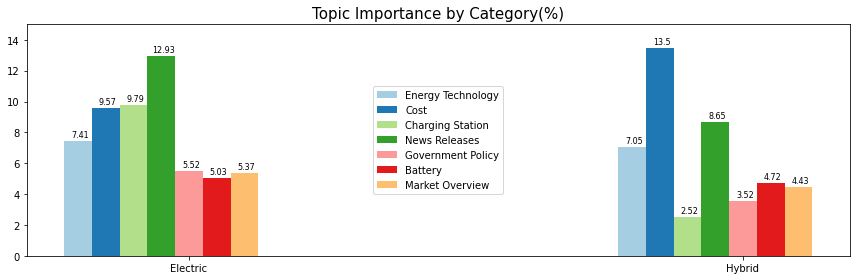

In [240]:
x = np.arange(2)  # the label locations
width = 0.05  # the width of the bars

fig=plt.figure(figsize=(12,4))

ax = fig.add_subplot(1, 1, 1)
rects1 = ax.bar(x - 0.2, topic1, width, label=topic_name[0],color=plt.get_cmap('Paired')(0))
rects2 = ax.bar(x - 0.15, topic2, width, label=topic_name[1],color=plt.get_cmap('Paired')(1))
rects3 = ax.bar(x- 0.1, topic3, width, label=topic_name[2],color=plt.get_cmap('Paired')(2))
rects4 = ax.bar(x - 0.05, topic4, width, label=topic_name[3],color=plt.get_cmap('Paired')(3))
rects5 = ax.bar(x ,topic5, width, label=topic_name[4],color=plt.get_cmap('Paired')(4))
rects6 = ax.bar(x + 0.05,topic6, width, label=topic_name[5],color=plt.get_cmap('Paired')(5))
rects7 = ax.bar(x + 0.1,topic7, width, label=topic_name[6],color=plt.get_cmap('Paired')(6))




# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Average Weights(%)')
ax.set_title("Topic Importance by Category(%)", 
              fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(['Electric','Hybrid'])
ax.legend(loc='center')
plt.ylim(0,15)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(2, 1.8),  # 3 points vertical offset
                    fontsize=8, color='black',
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)


fig.tight_layout()

plt.savefig('Category_topic_contribution124_merge.pdf',
            transparent=True,
            bbox_inches='tight',
            pad_inches=0)


plt.show()

#fig.savefig("Frequency.png", format = 'png' )

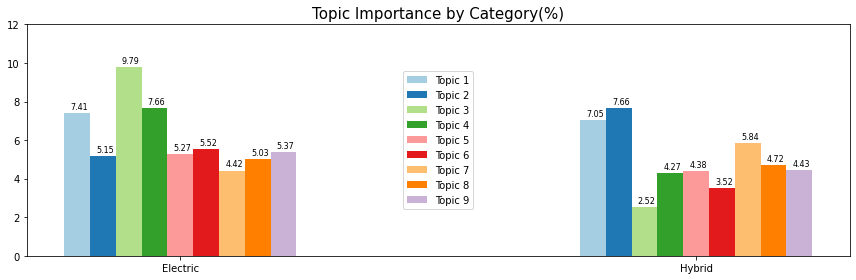

In [179]:
x = np.arange(len(labels))  # the label locations
width = 0.05  # the width of the bars

fig=plt.figure(figsize=(12,4))

ax = fig.add_subplot(1, 1, 1)
rects1 = ax.bar(x - 0.2, topic_1, width, label='Topic 1',color=plt.get_cmap('Paired')(0))
rects2 = ax.bar(x - 0.15, topic_2, width, label='Topic 2',color=plt.get_cmap('Paired')(1))
rects3 = ax.bar(x- 0.1, topic_3, width, label='Topic 3',color=plt.get_cmap('Paired')(2))
rects4 = ax.bar(x - 0.05, topic_4, width, label='Topic 4',color=plt.get_cmap('Paired')(3))
rects5 = ax.bar(x ,topic_5, width, label='Topic 5',color=plt.get_cmap('Paired')(4))
rects6 = ax.bar(x + 0.05,topic_6, width, label='Topic 6',color=plt.get_cmap('Paired')(5))
rects7 = ax.bar(x + 0.1,topic_7, width, label='Topic 7',color=plt.get_cmap('Paired')(6))
rects8 = ax.bar(x + 0.15,topic_8, width, label='Topic 8',color=plt.get_cmap('Paired')(7))
rects9 = ax.bar(x + 0.2,topic_9, width, label='Topic 9',color=plt.get_cmap('Paired')(8))



# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Average Weights(%)')
ax.set_title("Topic Importance by Category(%)", 
              fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylim(0,12)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(2, 2),  # 3 points vertical offset
                    fontsize=8, color='black',
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)
autolabel(rects8)
autolabel(rects9)

fig.tight_layout()

#plt.savefig('Category_topic_contribution124.pdf',
#            transparent=True,
#            bbox_inches='tight',
#            pad_inches=0)


plt.show()

#fig.savefig("Frequency.png", format = 'png' )

## previous

In [184]:
dominant_topic_df['Total_Docs_Percentage']=dominant_topic_df['Doc_Count']

In [185]:
dominant_topic_df['Total_Docs_Percentage'] = dominant_topic_df[
    'Total_Docs_Percentage'].apply(lambda row: round((row * 100) / len(CORPUS), 2))

In [196]:
#split
dominant_topic_df2 = corpus_topic_df.groupby(['Dominant Topic','Label']).agg(
    Doc_Count=('Dominant Topic', np.size)).reset_index()
dominant_topic_df2['Total_Docs_Percentage']=dominant_topic_df2['Doc_Count']
dominant_topic_df2['Total_Docs_Percentage'] = dominant_topic_df2[
    'Total_Docs_Percentage'].apply(lambda row: round((row * 100) / len(CORPUS), 2))

In [197]:
dominant_topic_df2

,Dominant Topic,Label,Doc_Count,Total_Docs_Percentage
0,1,Electric,4104,9.18
1,1,Hybrid,1921,4.30
2,2,Electric,3710,8.30
3,2,Hybrid,1450,3.24
4,3,Electric,3500,7.83
5,3,Hybrid,1446,3.23
6,4,Electric,4037,9.03
7,4,Hybrid,1034,2.31
8,5,Electric,3084,6.90
9,5,Hybrid,1983,4.43


In [204]:
labels = ['Electric','Hybrid']
topic_1 = dominant_topic_df2.loc[(dominant_topic_df2['Dominant Topic']==1),'Total_Docs_Percentage' ].tolist()
topic_2 = dominant_topic_df2.loc[(dominant_topic_df2['Dominant Topic']==2),'Total_Docs_Percentage' ].tolist()
topic_3 = dominant_topic_df2.loc[(dominant_topic_df2['Dominant Topic']==3),'Total_Docs_Percentage' ].tolist()
topic_4 = dominant_topic_df2.loc[(dominant_topic_df2['Dominant Topic']==4),'Total_Docs_Percentage' ].tolist()
topic_5 = dominant_topic_df2.loc[(dominant_topic_df2['Dominant Topic']==5),'Total_Docs_Percentage' ].tolist()
topic_6 = dominant_topic_df2.loc[(dominant_topic_df2['Dominant Topic']==6),'Total_Docs_Percentage' ].tolist()
topic_7 = dominant_topic_df2.loc[(dominant_topic_df2['Dominant Topic']==7),'Total_Docs_Percentage' ].tolist()
topic_8 = dominant_topic_df2.loc[(dominant_topic_df2['Dominant Topic']==8),'Total_Docs_Percentage' ].tolist()
topic_9 = dominant_topic_df2.loc[(dominant_topic_df2['Dominant Topic']==9),'Total_Docs_Percentage' ].tolist()

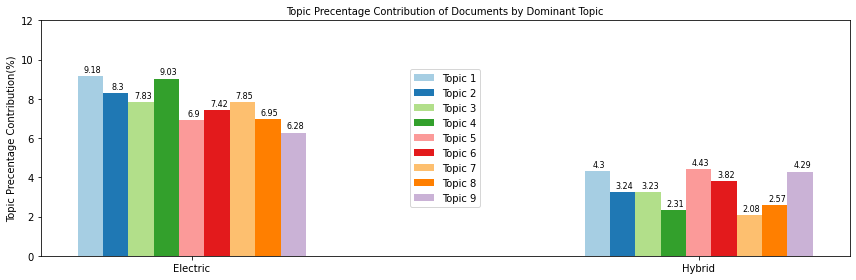

In [237]:

x = np.arange(len(labels))  # the label locations
width = 0.05  # the width of the bars

fig=plt.figure(figsize=(12,4))

ax = fig.add_subplot(1, 1, 1)
rects1 = ax.bar(x - 0.2, topic_1, width, label='Topic 1',color=plt.get_cmap('tab10')(0))
rects2 = ax.bar(x - 0.15, topic_2, width, label='Topic 2',color=plt.get_cmap('tab10')(1))
rects3 = ax.bar(x- 0.1, topic_3, width, label='Topic 3',color=plt.get_cmap('tab10')(2))
rects4 = ax.bar(x - 0.05, topic_4, width, label='Topic 4',color=plt.get_cmap('tab10')(3))
rects5 = ax.bar(x ,topic_5, width, label='Topic 5',color=plt.get_cmap('tab10')(4))
rects6 = ax.bar(x + 0.05,topic_6, width, label='Topic 6',color=plt.get_cmap('tab10')(5))
rects7 = ax.bar(x + 0.1,topic_7, width, label='Topic 7',color=plt.get_cmap('tab10')(6))
rects8 = ax.bar(x + 0.15,topic_8, width, label='Topic 8',color=plt.get_cmap('tab10')(7))
rects9 = ax.bar(x + 0.2,topic_9, width, label='Topic 9',color=plt.get_cmap('tab10')(8))



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Topic Precentage Contribution(%)')
ax.set_title("Topic Precentage Contribution of Documents by Dominant Topic", 
              fontsize=10)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center')
plt.ylim(0,12)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(2, 2),  # 3 points vertical offset
                    fontsize=8, color='black',
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)
autolabel(rects8)
autolabel(rects9)

fig.tight_layout()

plt.show()

#fig.savefig("Frequency.png", format = 'png' )

In [239]:
fig.savefig('topic contribution124.pdf',
            transparent=True,
            bbox_inches='tight',
            pad_inches=0)

Text(0, 0.5, 'Topic Precentage Contribution(%)')

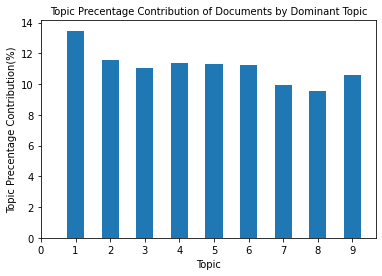

In [192]:
# Plot
fig=plt.figure(figsize=(6, 4))
ax1= fig.add_subplot(111)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant Topic', height='Total_Docs_Percentage', data=dominant_topic_df, width=.5)
ax1.set_xticks(range(10))
#tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
#ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Topic Precentage Contribution of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_xlabel('Topic')
ax1.set_ylabel('Topic Precentage Contribution(%)')
#ax1.set_ylim(0, 1000)

### which document makes the highest contribution to each topic

In [140]:
corpus_topic_df.groupby('Dominant Topic').apply(lambda topic_set: (
    topic_set.sort_values(by=['Contribution %'], ascending=False).iloc[0])
                                                ).reset_index(drop=True)

,Tweet Index,Dominant Topic,Contribution %,Topic Terms
0,41303,1,34.44,"energy, power, green, drive, solar, change, diesel, run, petrol, money, engine, stop, check, renewable, video, country, life, live, solar_panel, climate"
1,5662,2,30.68,"range, cost, tax, government, state, pay, owner, mile, infrastructure, low, driver, end, purchase, buy, support, fast, incentive, fee, add, include"
2,40413,3,41.33,"gas, make, emission, fuel, save, long, reduce, clean, policy, electricity, oil, ice, bad, pollution, environment, carbon, air, climate_change, efficient, ready"
3,22244,4,29.21,"charge, station, point, find, lot, charger, home, cheap, problem, parking, plug, hybrid, space, place, build, park, turn, hear, network, concept"
4,38618,5,36.73,"market, plugin, technology, news, future, tech, industry, share, read, global, create, company, report, patent, mobility, growth, phev, article, automaker, late"
5,10892,6,31.77,"free, offer, good, test, ride, drive, happy, feel, team, call, start, follow, bring, heres, watch, give, feature, family, post, order"
6,24148,7,32.53,"sale, price, sell, demand, large, lead, manufacturer, increase, maker, develop, world, investment, brand, hit, half, big, high, deliver, lithium, development"
7,37545,8,31.14,"city, system, business, solution, transportation, service, road, public, work, idea, option, bus, issue, afford, tunnel, speed, transport, lexus, spend, expensive"
8,8077,9,33.67,"battery, plan, launch, learn, design, production, produce, look_extend, component_warranty_mile_pick, set, fully, project, model, announce, plant, unveil, turkey, invest, innovation, europe"


In [252]:
year=[i.split('-')[0] for i in df.date.values]

In [253]:
set(year)

{'2015', '2016', '2017', '2018', '2019'}

In [257]:
# df_weights.to_csv('df_weights.csv')

In [241]:
df_weights = pd.DataFrame.from_records([{v: k for v, k in row} for row in tm_results])
df_weights.columns = ['Topic ' + str(i) for i in range(1,10)]
df_weights

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
0,0.109015,0.104822,0.157233,0.104822,0.104822,0.104822,0.104822,0.104822,0.104822
1,0.117284,0.113169,0.121399,0.102881,0.121399,0.102881,0.115226,0.102881,0.102881
2,0.130268,0.097701,0.095785,0.095785,0.113027,0.095785,0.113027,0.111111,0.147510
3,0.107468,0.140255,0.140255,0.107468,0.091075,0.123862,0.091075,0.107468,0.091075
4,0.102881,0.102881,0.102881,0.139918,0.102881,0.121399,0.121399,0.102881,0.102881
...,...,...,...,...,...,...,...,...,...
44713,0.176068,0.116239,0.100855,0.088889,0.085470,0.100855,0.097436,0.131624,0.102564
44714,0.095785,0.114943,0.113027,0.113027,0.095785,0.130268,0.128352,0.113027,0.095785
44715,0.141577,0.125448,0.098566,0.148746,0.096774,0.093190,0.100358,0.105735,0.089606
44716,0.097466,0.097466,0.115010,0.097466,0.097466,0.132554,0.130604,0.115010,0.116959


In [254]:
df_weights['Year'] = year
df_weights.groupby('Year').mean()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
Year,,,,,,,,,
2015,0.112729,0.111759,0.107864,0.115418,0.115740,0.110363,0.111379,0.107846,0.106901
2016,0.108874,0.111120,0.106299,0.120180,0.116185,0.107586,0.113692,0.105869,0.110195
2017,0.110289,0.111036,0.107526,0.111519,0.118455,0.109624,0.110224,0.107767,0.113560
2018,0.109060,0.109680,0.108444,0.109290,0.118180,0.109260,0.114228,0.110066,0.111793
2019,0.111186,0.111140,0.111684,0.111064,0.110135,0.111316,0.110766,0.111539,0.111169


In [255]:
df_weights['Dominant'] = df_weights.drop('Year', axis=1).idxmax(axis=1)
df_weights.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Year,Dominant
0,0.109015,0.104822,0.157233,0.104822,0.104822,0.104822,0.104822,0.104822,0.104822,2019,Topic 3
1,0.117284,0.113169,0.121399,0.102881,0.121399,0.102881,0.115226,0.102881,0.102881,2019,Topic 3
2,0.130268,0.097701,0.095785,0.095785,0.113027,0.095785,0.113027,0.111111,0.147510,2019,Topic 9
3,0.107468,0.140255,0.140255,0.107468,0.091075,0.123862,0.091075,0.107468,0.091075,2019,Topic 2
4,0.102881,0.102881,0.102881,0.139918,0.102881,0.121399,0.121399,0.102881,0.102881,2019,Topic 4


In [256]:
df_dominance = df_weights.groupby('Year')['Dominant'].value_counts(normalize=True).unstack()
df_dominance

Dominant,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
Year,,,,,,,,,
2015,0.172589,0.126904,0.078680,0.180203,0.200508,0.086294,0.104061,0.032995,0.017766
2016,0.180288,0.105769,0.062500,0.237981,0.151442,0.060096,0.137019,0.031250,0.033654
2017,0.131391,0.119121,0.067996,0.121677,0.212168,0.081800,0.087423,0.052658,0.125767
2018,0.107500,0.114500,0.080000,0.090500,0.202750,0.085250,0.126750,0.082750,0.110000
2019,0.136883,0.115277,0.116884,0.113327,0.097465,0.117701,0.096490,0.100074,0.105897


In [261]:
df_weights['Label']=df['label']

In [262]:
df_journals = df_weights.groupby(['Label', 'Year'])['Dominant'].value_counts(normalize=True).unstack()
df_journals.head(15)

Dominant     Topic 1   Topic 2   Topic 3   Topic 4   Topic 5   Topic 6  \
Label Year                                                               
0     2015  0.172589  0.126904  0.078680  0.180203  0.200508  0.086294   
      2016  0.180288  0.105769  0.062500  0.237981  0.151442  0.060096   
      2017  0.118022  0.132376  0.039872  0.197767  0.266348  0.031898   
      2018  0.112975  0.130872  0.068233  0.135347  0.189038  0.043624   
      2019  0.131244  0.118418  0.116373  0.125559  0.090339  0.110930   
1     2017  0.137698  0.112867  0.081264  0.085779  0.186606  0.105342   
      2018  0.105924  0.109788  0.083387  0.077592  0.206697  0.097231   
      2019  0.154750  0.105327  0.118506  0.074574  0.120044  0.139154   

Dominant     Topic 7   Topic 8   Topic 9  
Label Year                                
0     2015  0.104061  0.032995  0.017766  
      2016  0.137019  0.031250  0.033654  
      2017  0.127592  0.038278  0.047847  
      2018  0.220358  0.032438  0.067114  
      2019  0.108642  0.105002  0.093493  
1     2017  0.068473  0.059443  0.162528  
      2018  0.099807  0.097231  0.122344  
      2019  0.057990  0.084459  0.145195

In [ ]:
df_journals.reset_index(inplace=True)
df_melted = df_journals.melt(id_vars=['Label', 'Year'], value_vars=['Topic ' + str(i) for i in range(1,11)], var_name='Topic', value_name='Prevelance')
df_melted

In [ ]:
# create multiindex dataframe
df_journals.set_index(['Journal', 'Year'], inplace=True)

# set the figure size
plt.rcParams['figure.figsize'] = [10, 6]

# loop over each journal
for j in df_journals.index.levels[0]:
  
  # get cross-section and plot
  df_journals.xs(j, level=0).plot.area()
  
  plt.title(j)
  plt.legend(loc='upper left')

plt.show()